In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from clean import (
    rename_columns,
    convert_numeric_columns,
    validate_dataset,
    rename_columns_plotting,
)

In [2]:
df = pd.read_csv("../data/TBI PUD 10-08-2013.csv", dtype=str)
print(df.columns.to_list())

['PatNum', 'EmplType', 'Certification', 'InjuryMech', 'High_impact_InjSev', 'Amnesia_verb', 'LOCSeparate', 'LocLen', 'Seiz', 'SeizOccur', 'SeizLen', 'ActNorm', 'HA_verb', 'HASeverity', 'HAStart', 'Vomit', 'VomitNbr', 'VomitStart', 'VomitLast', 'Dizzy', 'Intubated', 'Paralyzed', 'Sedated', 'GCSEye', 'GCSVerbal', 'GCSMotor', 'GCSTotal', 'GCSGroup', 'AMS', 'AMSAgitated', 'AMSSleep', 'AMSSlow', 'AMSRepeat', 'AMSOth', 'SFxPalp', 'SFxPalpDepress', 'FontBulg', 'SFxBas', 'SFxBasHem', 'SFxBasOto', 'SFxBasPer', 'SFxBasRet', 'SFxBasRhi', 'Hema', 'HemaLoc', 'HemaSize', 'Clav', 'ClavFace', 'ClavNeck', 'ClavFro', 'ClavOcc', 'ClavPar', 'ClavTem', 'NeuroD', 'NeuroDMotor', 'NeuroDSensory', 'NeuroDCranial', 'NeuroDReflex', 'NeuroDOth', 'OSI', 'OSIExtremity', 'OSICut', 'OSICspine', 'OSIFlank', 'OSIAbdomen', 'OSIPelvis', 'OSIOth', 'Drugs', 'CTForm1', 'IndAge', 'IndAmnesia', 'IndAMS', 'IndClinSFx', 'IndHA', 'IndHema', 'IndLOC', 'IndMech', 'IndNeuroD', 'IndRqstMD', 'IndRqstParent', 'IndRqstTrauma', 'IndSeiz

Lets start with the naming of the columns. We can see, that there is no clear structure in the naming of the columns and especially variables like 'Finding1' don't give a clear impression, what is in the variable. So we rename all the column_names based on the 

In [3]:
df = rename_columns(df)
print(df.columns.to_list())

['patient_id', 'physician_position', 'physician_certification', 'mechanism_injury', 'injury_severity_high_impact', 'amnesia_present', 'loss_of_consciousness', 'unconscious_duration', 'posttraumatic_seizure', 'time_of_seizure', 'duration_of_seizure', 'acting_normal_after_injury', 'headache_reported', 'headache_intensity', 'headache_onset_time', 'vomiting_reported', 'vomiting_episode_count', 'vomiting_onset_time', 'last_vomiting_time', 'dizziness_reported', 'intubation_status', 'pharmacologically_paralyzed', 'pharmacologically_sedated', 'gcs_eye', 'gcs_verbal', 'gcs_motor', 'gcs_total', 'gcs_group', 'altered_mental_status', 'ams_agitated', 'ams_sleepy', 'ams_slow_response', 'ams_repetitive_questions', 'ams_other', 'palpable_skull_fracture', 'palpable_skull_fracture_depressed', 'fontanelle_bulging', 'basilar_skull_fracture_signs', 'basilar_skull_fracture_hemotympanum', 'basilar_skull_fracture_otorrhea', 'basilar_skull_fracture_periorbital_ecchymosis', 'basilar_skull_fracture_retroauricula

To get now a good overview about the data, i create a report of the data with ydata_profiling and can understand with that better our data, the values of our data and what happen there in detail

In [4]:
# from ydata_profiling import ProfileReport

# Generate the profiling report
# profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)

# Save the report as an HTML file
# profile.to_file("profiling_report.html")

With this report I now go over the columns and try to recognize problems in individual columns and then adress them specific in the following part. 

In [5]:
df = convert_numeric_columns(df)
validate_dataset(df)

All values are valid!


The first positive news is that all existing entries correspond to the entries in the documentation and there are no variables that do not appear in the documentation. Nevertheless, we see a relatively large number of missing values in various columns and also inconsistencies between individual variables that should not actually occur. We check this, with that code:

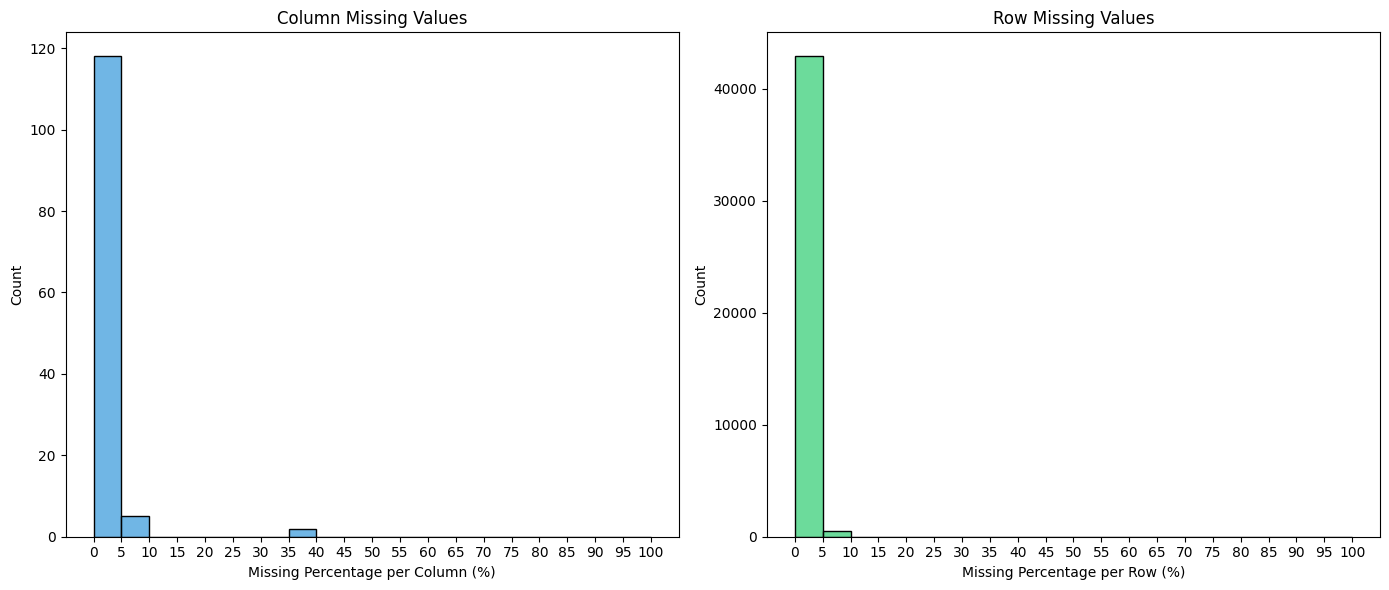

In [6]:
missing_perc_columns = df.isnull().mean() * 100
missing_perc_rows = df.isnull().mean(axis=1) * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(
    data=missing_perc_columns,
    bins=np.arange(0, 105, 5),
    color="#3498db",
    edgecolor="black",
    alpha=0.7,
)
plt.xlabel("Missing Percentage per Column (%)")
plt.ylabel("Count")
plt.title("Column Missing Values")
plt.xticks(np.arange(0, 105, 5))

plt.subplot(1, 2, 2)
sns.histplot(
    data=missing_perc_rows,
    bins=np.arange(0, 105, 5),
    color="#2ecc71",
    edgecolor="black",
    alpha=0.7,
)
plt.xlabel("Missing Percentage per Row (%)")
plt.ylabel("Count")
plt.title("Row Missing Values")
plt.xticks(np.arange(0, 105, 5))

plt.tight_layout()
plt.show()

In [7]:
missing_perc = df.isnull().mean()

columns_with_more_than_30 = missing_perc[missing_perc > 0.20].index.tolist()

print("Columns with more than 20% missing values:")
for col in columns_with_more_than_30:
    print(col)

Columns with more than 20% missing values:
dizziness_reported
ethnicity


In [8]:
df = df.drop(columns=["dizziness_reported", "ethnicity"])

This former plot shows us, that there is not a big problem with the single rows and only a problem with some of our columns. I think, that we should drop the columns with missing values of 35-40%, because there are too many missing values, that we can really use them. Also the both columns dizziness_reported and ethnicity aren't probably the most important values for our dataset.

However, before I fill the missing values with a model, I decided to take a closer look at the logic errors in the existing data and, if possible, solve them so that the model has a better data set for the missing values later on. 

We have already established above that there are no “incorrect” values outside the deinition range. In a first step, I now check the numeric values to ensure that only “realistic” values occur there. We don't check the patient_id, because we see in the report, that it is distinct

In [9]:
df_subset = df.replace({90: np.nan, 91: np.nan, 92: np.nan})
df_subset = rename_columns_plotting(df_subset)
print(df_subset.columns.to_list())

['Patient ID', 'Physician Position', 'Physician Certification', 'Mechanism of Injury', 'High-Impact Injury Severity', 'Amnesia Present', 'Loss of Consciousness', 'Duration of Unconsciousness', 'Post-Traumatic Seizure', 'Time of Seizure', 'Duration of Seizure', 'Acting Normal After Injury', 'Headache Reported', 'Headache Intensity', 'Headache Onset Time', 'Vomiting Reported', 'Number of Vomiting Episodes', 'Vomiting Onset Time', 'Last Vomiting Episode', 'Intubation Status', 'Pharmacologically Paralyzed', 'Pharmacologically Sedated', 'GCS Eye Response', 'GCS Verbal Response', 'GCS Motor Response', 'Total GCS Score', 'GCS Group', 'Altered Mental Status', 'AMS - Agitated', 'AMS - Sleepy', 'AMS - Slow Response', 'AMS - Repetitive Questions', 'AMS - Other', 'Palpable Skull Fracture', 'Depressed Skull Fracture', 'Bulging Fontanelle', 'Signs of Basilar Skull Fracture', 'Hemotympanum', 'CSF Otorrhea', 'Periorbital Ecchymosis', 'Retroauricular Ecchymosis', 'CSF Rhinorrhea', 'Scalp Hematoma Prese

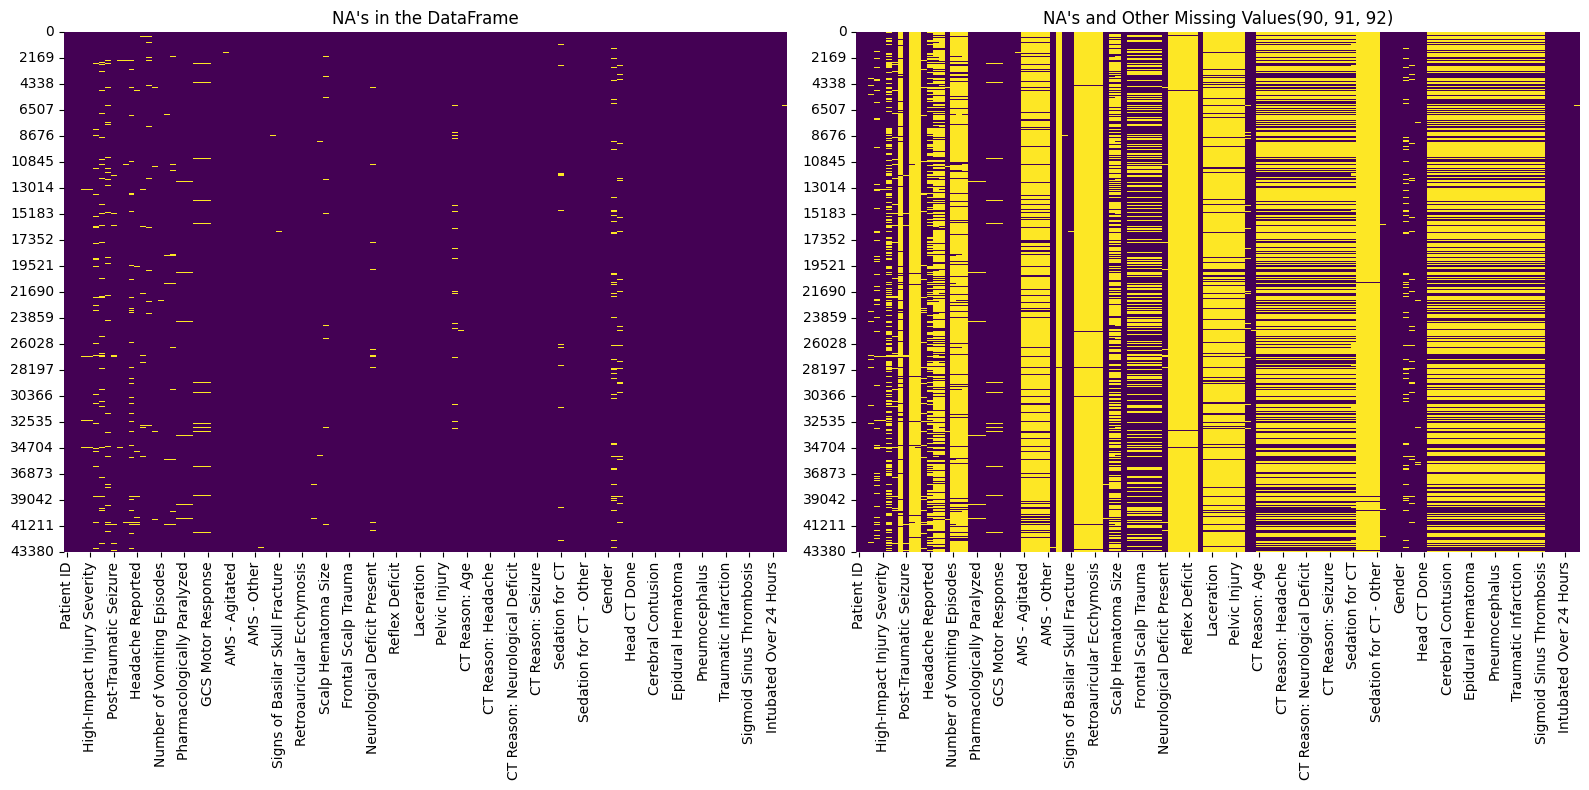

In [10]:
data = rename_columns_plotting(df)
df_subset = df.replace({90: np.nan, 91: np.nan, 92: np.nan})
df_subset = rename_columns_plotting(df_subset)

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))


def set_fewer_yticks(ax, dataframe):
    # Set y-axis ticks at reasonable intervals
    step = max(1, dataframe.shape[0] // 20)
    tick_positions = np.arange(0, dataframe.shape[0], step)
    tick_labels = dataframe.index[::step]
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(tick_labels, rotation=0)


# Plot missing values heatmaps
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", ax=axes[0])
axes[0].set_title("NA's in the DataFrame")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
set_fewer_yticks(axes[0], data)

sns.heatmap(df_subset.isnull(), cbar=False, cmap="viridis", ax=axes[1])
axes[1].set_title("NA's and Other Missing Values(90, 91, 92)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
set_fewer_yticks(axes[1], df_subset)

plt.tight_layout()
# Use png, because svg is 2GB big
plt.savefig("../figs/missing_values.png", format="png", bbox_inches="tight")
plt.show()

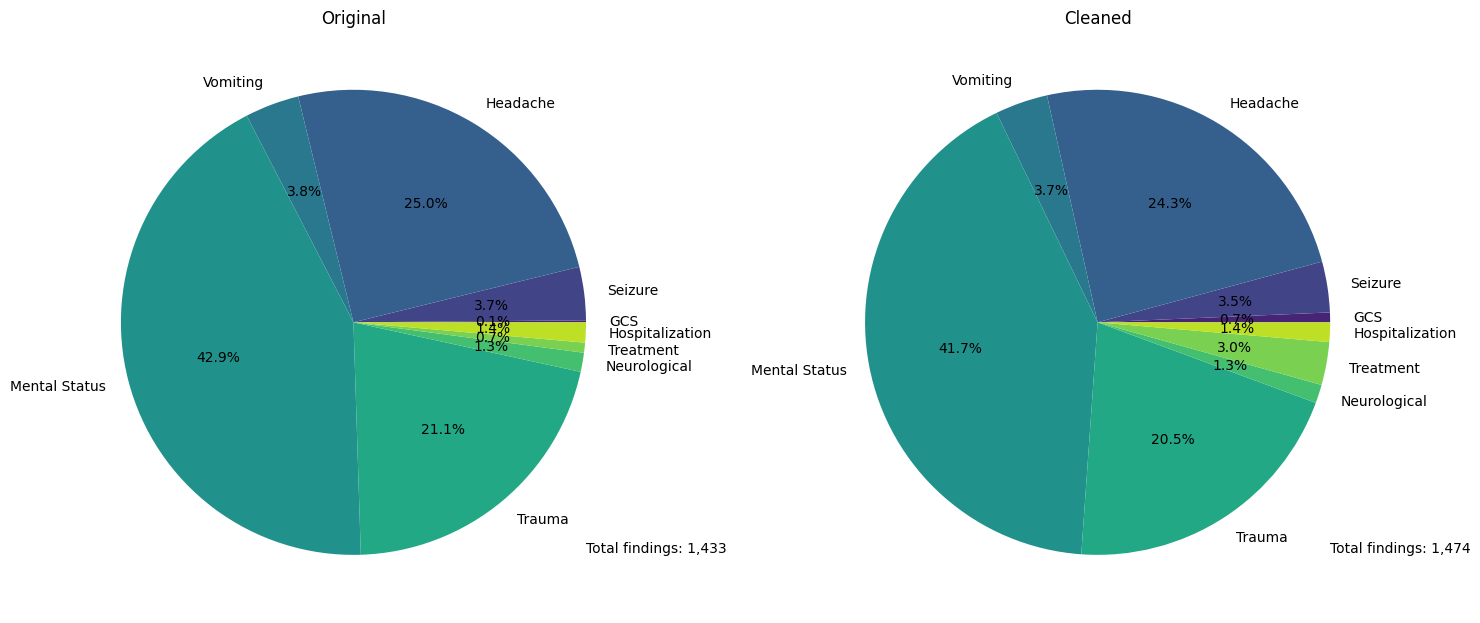

                Cleaned Inconsistent_Records Original Inconsistent_Records  \
GCS                                       10                             2   
Headache                                 358                           358   
Hospitalization                           20                            20   
Mental Status                            615                           615   
Neurological                              19                            19   
Seizure                                   52                            53   
Trauma                                   302                           302   
Treatment                                 44                            10   
Vomiting                                  54                            54   
Total                                  1,474                         1,433   

                Cleaned Percentage Original Percentage  
GCS                          0.02%                0.0%  
Headache                   

In [11]:
def check_tbi_data_consistency(df: pd.DataFrame) -> dict:
    """
    Comprehensive TBI data consistency checker using correct column names
    """
    all_checks = {}

    # 1. Age Checks
    all_checks["Age"] = [
        (df["age_in_years"] < 0),
        (df["age_in_years"] > 20),
        (df["age_in_months"] < 0),
        (df["age_in_months"] > 240),
        # Age category mismatch
        (df["age_category"] == 2) & (df["age_in_years"] < 2),
        (df["age_category"] == 1) & (df["age_in_years"] >= 2),
    ]

    # 2. GCS (Glasgow Coma Scale) Checks
    all_checks["GCS"] = [
        # Valid ranges for components
        (df["gcs_eye"] < 1) | (df["gcs_eye"] > 4),
        (df["gcs_verbal"] < 1) | (df["gcs_verbal"] > 5),
        (df["gcs_motor"] < 1) | (df["gcs_motor"] > 6),
        (df["gcs_total"] < 3) | (df["gcs_total"] > 15),
        # Total must equal sum of components
        (df["gcs_eye"] + df["gcs_verbal"] + df["gcs_motor"] != df["gcs_total"]),
        # GCS group consistency
        (df["gcs_total"] >= 14) & (df["gcs_group"] == 1),
        (df["gcs_total"] < 14) & (df["gcs_group"] == 2),
    ]

    # 3. Seizure Logic
    all_checks["Seizure"] = [
        # No seizure but has details
        (df["posttraumatic_seizure"] == 0) & (df["time_of_seizure"].isin([1, 2, 3])),
        (df["posttraumatic_seizure"] == 0)
        & (df["duration_of_seizure"].isin([1, 2, 3, 4])),
        # Seizure present but no details
        (df["posttraumatic_seizure"] == 1)
        & (~df["time_of_seizure"].isin([1, 2, 3]))
        & (~df["duration_of_seizure"].isin([1, 2, 3, 4])),
    ]

    # 4. Headache Logic
    all_checks["Headache"] = [
        # No headache but has details
        (df["headache_reported"] == 0) & (df["headache_intensity"].isin([1, 2, 3])),
        (df["headache_reported"] == 0) & (df["headache_onset_time"].isin([1, 2, 3, 4])),
        # Headache present but no details
        (df["headache_reported"] == 1)
        & (~df["headache_intensity"].isin([1, 2, 3]))
        & (~df["headache_onset_time"].isin([1, 2, 3, 4])),
    ]

    # 5. Vomiting Logic
    all_checks["Vomiting"] = [
        # No vomiting but has details
        (df["vomiting_reported"] == 0) & (df["vomiting_episode_count"].isin([1, 2, 3])),
        (df["vomiting_reported"] == 0) & (df["vomiting_onset_time"].isin([1, 2, 3, 4])),
        (df["vomiting_reported"] == 0) & (df["last_vomiting_time"].isin([1, 2, 3])),
        # Vomiting present but no details
        (df["vomiting_reported"] == 1)
        & (~df["vomiting_episode_count"].isin([1, 2, 3]))
        & (~df["vomiting_onset_time"].isin([1, 2, 3, 4]))
        & (~df["last_vomiting_time"].isin([1, 2, 3])),
    ]

    # 6. Mental Status Logic
    all_checks["Mental Status"] = [
        # No AMS but has symptoms
        (df["altered_mental_status"] == 0)
        & (
            (df["ams_agitated"] == 1)
            | (df["ams_sleepy"] == 1)
            | (df["ams_slow_response"] == 1)
            | (df["ams_repetitive_questions"] == 1)
            | (df["ams_other"] == 1)
        ),
        # AMS present but no symptoms
        (df["altered_mental_status"] == 1)
        & (df["ams_agitated"] == 0)
        & (df["ams_sleepy"] == 0)
        & (df["ams_slow_response"] == 0)
        & (df["ams_repetitive_questions"] == 0)
        & (df["ams_other"] == 0),
    ]

    # 7. Skull Fracture Logic
    all_checks["Skull Fracture"] = [
        # No palpable skull fracture but has depression
        (df["palpable_skull_fracture"] == 0)
        & (df["palpable_skull_fracture_depressed"] == 1),
        # No basilar fracture signs but has specific signs
        (df["basilar_skull_fracture_signs"] == 0)
        & (
            (df["basilar_skull_fracture_hemotympanum"] == 1)
            | (df["basilar_skull_fracture_otorrhea"] == 1)
            | (df["basilar_skull_fracture_periorbital_ecchymosis"] == 1)
            | (df["basilar_skull_fracture_retroauricular_ecchymosis"] == 1)
            | (df["basilar_skull_fracture_rhinorrhea"] == 1)
        ),
    ]

    # 8. Hematoma Logic
    all_checks["Hematoma"] = [
        # No hematoma but has details
        (df["scalp_hematoma_present"] == 0)
        & (df["scalp_hematoma_location"].isin([1, 2, 3])),
        (df["scalp_hematoma_present"] == 0)
        & (df["scalp_hematoma_size"].isin([1, 2, 3])),
    ]

    # 9. Trauma Location Logic
    all_checks["Trauma"] = [
        # No trauma above clavicles but has specific locations
        (df["trauma_above_clavicles"] == 0)
        & (
            (df["trauma_face"] == 1)
            | (df["trauma_neck"] == 1)
            | (df["trauma_scalp_frontal"] == 1)
            | (df["trauma_scalp_occipital"] == 1)
            | (df["trauma_scalp_parietal"] == 1)
            | (df["trauma_scalp_temporal"] == 1)
        ),
        # Trauma above clavicles but no specific location
        (df["trauma_above_clavicles"] == 1)
        & (df["trauma_face"] == 0)
        & (df["trauma_neck"] == 0)
        & (df["trauma_scalp_frontal"] == 0)
        & (df["trauma_scalp_occipital"] == 0)
        & (df["trauma_scalp_parietal"] == 0)
        & (df["trauma_scalp_temporal"] == 0),
    ]

    # 10. Neurological Deficit Logic
    all_checks["Neurological"] = [
        # No neurological deficit but has specific deficits
        (df["neurological_deficit_present"] == 0)
        & (
            (df["neurological_deficit_motor"] == 1)
            | (df["neurological_deficit_sensory"] == 1)
            | (df["neurological_deficit_cranial_nerve"] == 1)
            | (df["neurological_deficit_reflexes"] == 1)
            | (df["neurological_deficit_other"] == 1)
        ),
        # Deficit present but no specific deficit marked
        (df["neurological_deficit_present"] == 1)
        & (df["neurological_deficit_motor"] == 0)
        & (df["neurological_deficit_sensory"] == 0)
        & (df["neurological_deficit_cranial_nerve"] == 0)
        & (df["neurological_deficit_reflexes"] == 0)
        & (df["neurological_deficit_other"] == 0),
    ]

    # 11. Other Injury Logic
    all_checks["Other Injury"] = [
        # No other injury but has specific injuries
        (df["other_substantial_injury"] == 0)
        & (
            (df["other_injury_extremity"] == 1)
            | (df["other_injury_laceration"] == 1)
            | (df["other_injury_cspine"] == 1)
            | (df["other_injury_chest_back_flank"] == 1)
            | (df["other_injury_abdomen"] == 1)
            | (df["other_injury_pelvis"] == 1)
            | (df["other_injury_other"] == 1)
        )
    ]

    # 12. CT Planning and Sedation Logic
    all_checks["CT Planning"] = [
        # No CT planned but has reasons
        (df["head_ct_planned"] == 0)
        & (
            (df["ct_reason_age"] == 1)
            | (df["ct_reason_amnesia"] == 1)
            | (df["ct_reason_ams"] == 1)
            | (df["ct_reason_clinical_skull_fracture"] == 1)
            | (df["ct_reason_headache"] == 1)
            | (df["ct_reason_scalp_hematoma"] == 1)
            | (df["ct_reason_loss_of_consciousness"] == 1)
            | (df["ct_reason_mechanism"] == 1)
            | (df["ct_reason_neurological_deficit"] == 1)
            | (df["ct_reason_request_md"] == 1)
            | (df["ct_reason_request_parent"] == 1)
            | (df["ct_reason_request_trauma"] == 1)
            | (df["ct_reason_seizure"] == 1)
            | (df["ct_reason_vomiting"] == 1)
            | (df["ct_reason_xray_skull_fracture"] == 1)
            | (df["ct_reason_other"] == 1)
        ),
        # Sedation inconsistencies
        (df["sedation_for_ct"] == 0)
        & (
            (df["sedation_for_ct_agitated"] == 1)
            | (df["sedation_for_ct_age"] == 1)
            | (df["sedation_for_ct_tech_request"] == 1)
            | (df["sedation_for_ct_other"] == 1)
        ),
    ]

    # 13. CT Findings Logic
    all_checks["CT Findings"] = [
        # TBI detected but no CT done
        (df["tbi_detected_on_ct"] == 1) & (df["head_ct_done"] == 0),
        # No TBI but has findings
        (df["tbi_detected_on_ct"] == 0)
        & (
            (df["cerebellar_hemorrhage"] == 1)
            | (df["cerebral_contusion"] == 1)
            | (df["cerebral_edema"] == 1)
            | (df["cerebral_hemorrhage"] == 1)
            | (df["skull_diastasis"] == 1)
            | (df["epidural_hematoma"] == 1)
            | (df["extra_axial_hematoma"] == 1)
            | (df["intraventricular_hemorrhage"] == 1)
            | (df["midline_shift"] == 1)
            | (df["pneumocephalus"] == 1)
            | (df["subarachnoid_hemorrhage"] == 1)
            | (df["subdural_hematoma"] == 1)
            | (df["traumatic_infarction"] == 1)
            | (df["diffuse_axonal_injury"] == 1)
            | (df["herniation"] == 1)
            | (df["shear_injury"] == 1)
            | (df["sigmoid_sinus_thrombosis"] == 1)
        ),
    ]

    # 14. Treatment and Disposition Logic
    all_checks["Treatment"] = [
        # Medication contradictions
        (df["pharmacologically_paralyzed"] == 1) & (df["gcs_motor"] > 1),
        (df["pharmacologically_sedated"] == 1) & (df["altered_mental_status"] == 0),
        (df["intubation_status"] == 1) & (df["gcs_verbal"] > 1),
        # Disposition contradictions
        (df["death_due_to_tbi"] == 1) & (df["ed_disposition"] == 1),
        (df["intubated_over_24hrs"] == 1) & (df["ed_disposition"] == 1),
        (df["neurosurgery"] == 1) & (df["ed_disposition"] == 1),
        (df["clinically_important_tbi"] == 1) & (df["ed_disposition"] == 1),
    ]

    # 15. Hospitalization Logic
    all_checks["Hospitalization"] = [
        # Not hospitalized but has details
        (df["hospitalized_due_to_head_injury"] == 0)
        & (df["hospitalized_head_injury_tbi_ct"] == 1),
        # Hospitalized but discharged
        (df["hospitalized_due_to_head_injury"] == 1) & (df["ed_disposition"] == 1),
        # Neurosurgery but not hospitalized
        (df["neurosurgery"] == 1) & (df["hospitalized_due_to_head_injury"] == 0),
    ]

    return all_checks


def generate_inconsistency_report(
    df1: pd.DataFrame, df2: pd.DataFrame, names: list = ["Dataset 1", "Dataset 2"]
):
    """
    Generate a report and visualizations of inconsistencies found in two datasets
    """

    # Process results for a single dataset
    def process_dataset_results(df, dataset_name):
        checks = check_tbi_data_consistency(df)
        results = []

        for category, check_list in checks.items():
            category_inconsistencies = 0
            for check in check_list:
                n_inconsistent = check.sum()
                category_inconsistencies += n_inconsistent

            if category_inconsistencies > 0:
                results.append(
                    {
                        "Dataset": dataset_name,
                        "Category": category,
                        "Inconsistent_Records": category_inconsistencies,
                        "Percentage": (category_inconsistencies / len(df)) * 100,
                    }
                )

        return pd.DataFrame(results)

    # Process both datasets
    results_df1 = process_dataset_results(df1, names[0])
    results_df2 = process_dataset_results(df2, names[1])
    combined_results = pd.concat([results_df1, results_df2])

    # Create pie plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # Get colors from seaborn's color palette
    colors = sns.color_palette(
        "viridis", n_colors=len(combined_results["Category"].unique())
    )

    # Plot for first dataset
    data1 = results_df1["Inconsistent_Records"]
    labels1 = results_df1["Category"]
    ax1.pie(data1, labels=labels1, colors=colors, autopct="%1.1f%%")
    ax1.set_title(names[0])
    # Add total number of findings
    total_findings1 = data1.sum()
    ax1.text(
        1,
        -1,
        f"Total findings: {total_findings1:,}",
        horizontalalignment="left",
        verticalalignment="bottom",
    )

    # Plot for second dataset
    data2 = results_df2["Inconsistent_Records"]
    labels2 = results_df2["Category"]
    ax2.pie(data2, labels=labels2, colors=colors, autopct="%1.1f%%")
    ax2.set_title(names[1])
    # Add total number of findings
    total_findings2 = data2.sum()
    ax2.text(
        1,
        -1,
        f"Total findings: {total_findings2:,}",
        horizontalalignment="left",
        verticalalignment="bottom",
    )

    plt.tight_layout()
    plt.savefig("../figs/inconsistencies.svg", format="svg", bbox_inches="tight")
    plt.show()

    # Create summary table
    summary_table = combined_results.pivot(
        index="Category",
        columns="Dataset",
        values=["Inconsistent_Records", "Percentage"],
    )

    # Flatten column multi-index
    summary_table.columns = [f"{col[1]} {col[0]}" for col in summary_table.columns]

    # Add totals row
    totals = pd.DataFrame(
        {
            f"{names[0]} Inconsistent_Records": [
                results_df1["Inconsistent_Records"].sum()
            ],
            f"{names[0]} Percentage": [results_df1["Percentage"].mean()],
            f"{names[1]} Inconsistent_Records": [
                results_df2["Inconsistent_Records"].sum()
            ],
            f"{names[1]} Percentage": [results_df2["Percentage"].mean()],
        },
        index=["Total"],
    )

    summary_table = pd.concat([summary_table, totals])

    # Format percentages
    for col in summary_table.columns:
        if "Percentage" in col:
            summary_table[col] = summary_table[col].round(2).astype(str) + "%"
        else:
            summary_table[col] = summary_table[col].map("{:,.0f}".format)

    return combined_results, fig, summary_table


# Example usage:
df_cleaned = pd.read_csv("../data/dataframe_after_cleaning.csv")
df_cleaned = convert_numeric_columns(df_cleaned)

results_df, fig, summary_table = generate_inconsistency_report(
    df, df_cleaned, names=["Original", "Cleaned"]
)

print(summary_table)